# MODULE 6

In [0]:
import pandas as pd
import numpy as np
import sklearn.cluster
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import re
import glob
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

## 6.1

**Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps**

In [0]:
def read_csv( filename ):
    if isinstance(filename, pd.DataFrame): return filename
    dataframe = pd.read_csv( filename, parse_dates=['Date'] )
    dataframe.set_index( dataframe.Date, inplace=True )
    return dataframe

def getName( filename ):
    return re.sub(r'^.+/|\.[^.]+$',     '',    filename)

def getCap( filename ):
    return re.sub(r'^.*/(\w+_Cap)/.*$', '\\1', filename)

In [0]:
filenames = glob.glob('/content/drive/My Drive/DataScience/Aspiration Internship/Stokes/**/*.csv')

portfolio_caps_seen = { getCap(filename): 0 for filename in filenames }
portfolio = DataFrame()
for filename in filenames:
    if  portfolio_caps_seen[ getCap(filename) ] < 10:
        portfolio_caps_seen[ getCap(filename) ] += 1

        portfolio[ getName(filename) ] = read_csv(filename).drop(read_csv(filename).Series[read_csv(filename)['Series'] != 'EQ'].index)['Close Price']


In [4]:
print('portfolio.shape:          ', portfolio.shape)
print('portfolio.shape:          ', portfolio.isnull().sum())
print('portfolio.shape.dropna(): ', portfolio.dropna().shape)
portfolio.head()

portfolio.shape:           (491, 30)
portfolio.shape:           M&M           0
ITC           2
BAJFINANCE    0
GAIL          0
CIPLA         0
INFRATEL      0
DRREDDY       0
BPCL          1
INFY          1
LT            0
JINDALSTEL    0
RELINFRA      0
AMARAJABAT    0
SUNTV         0
PNB           0
IDBI          0
IGL           3
MINDTREE      0
CASTROLIND    1
NBCC          0
JKLAKSHMI     0
IDFC          1
SONATSOFTW    0
ASHOKA        0
PVR           1
FORTIS        1
LAXMIMACH     0
RAYMOND       0
VIPIND        0
MINDAIND      1
dtype: int64
portfolio.shape.dropna():  (481, 30)


,M&M,ITC,BAJFINANCE,GAIL,CIPLA,INFRATEL,DRREDDY,BPCL,INFY,LT,JINDALSTEL,RELINFRA,AMARAJABAT,SUNTV,PNB,IDBI,IGL,MINDTREE,CASTROLIND,NBCC,JKLAKSHMI,IDFC,SONATSOFTW,ASHOKA,PVR,FORTIS,LAXMIMACH,RAYMOND,VIPIND,MINDAIND
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-15,1375.65,277.95,1332.95,414.00,569.00,371.05,2675.80,727.85,951.55,1742.40,114.20,605.40,933.40,912.20,166.80,75.05,1000.25,509.45,449.85,197.60,510.80,63.70,162.65,216.05,1524.95,205.25,4614.05,772.80,199.20,517.90
2017-05-16,1366.35,283.45,1347.75,411.40,565.60,376.55,2724.10,733.30,955.00,1740.70,114.10,611.05,924.70,894.70,174.15,76.65,1005.80,511.30,443.00,198.25,527.50,64.25,158.60,214.90,1539.00,207.90,4589.80,785.00,200.90,545.60
2017-05-17,1378.80,281.65,1324.80,408.30,562.35,389.90,2736.90,727.45,952.80,1755.45,116.40,605.25,937.70,887.05,165.05,75.95,1019.10,506.35,439.55,200.35,516.20,63.35,158.25,217.00,1530.30,205.90,4637.25,783.65,199.65,560.10
2017-05-18,1352.85,277.90,1314.55,404.75,560.10,378.90,2678.95,714.90,961.75,1722.60,113.30,578.65,912.10,871.35,158.50,69.95,1002.55,492.90,433.95,194.20,478.95,61.50,157.40,209.65,1515.05,196.85,4544.45,746.95,193.30,545.25
2017-05-19,1333.40,286.20,1289.15,401.05,564.95,378.95,2656.45,702.45,957.95,1724.55,112.15,569.55,895.75,852.40,155.20,68.75,1000.15,497.50,437.10,193.55,469.55,61.15,151.90,206.25,1513.55,203.55,4522.70,723.10,195.95,560.80


In [5]:
portfolio.dropna(axis=0, inplace=True)
print('portfolio.shape:          ', portfolio.isnull().sum())
print('portfolio.shape.dropna(): ', portfolio.dropna().shape)
portfolio.head()

portfolio.shape:           M&M           0
ITC           0
BAJFINANCE    0
GAIL          0
CIPLA         0
INFRATEL      0
DRREDDY       0
BPCL          0
INFY          0
LT            0
JINDALSTEL    0
RELINFRA      0
AMARAJABAT    0
SUNTV         0
PNB           0
IDBI          0
IGL           0
MINDTREE      0
CASTROLIND    0
NBCC          0
JKLAKSHMI     0
IDFC          0
SONATSOFTW    0
ASHOKA        0
PVR           0
FORTIS        0
LAXMIMACH     0
RAYMOND       0
VIPIND        0
MINDAIND      0
dtype: int64
portfolio.shape.dropna():  (481, 30)


,M&M,ITC,BAJFINANCE,GAIL,CIPLA,INFRATEL,DRREDDY,BPCL,INFY,LT,JINDALSTEL,RELINFRA,AMARAJABAT,SUNTV,PNB,IDBI,IGL,MINDTREE,CASTROLIND,NBCC,JKLAKSHMI,IDFC,SONATSOFTW,ASHOKA,PVR,FORTIS,LAXMIMACH,RAYMOND,VIPIND,MINDAIND
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-15,1375.65,277.95,1332.95,414.00,569.00,371.05,2675.80,727.85,951.55,1742.40,114.20,605.40,933.40,912.20,166.80,75.05,1000.25,509.45,449.85,197.60,510.80,63.70,162.65,216.05,1524.95,205.25,4614.05,772.80,199.20,517.90
2017-05-16,1366.35,283.45,1347.75,411.40,565.60,376.55,2724.10,733.30,955.00,1740.70,114.10,611.05,924.70,894.70,174.15,76.65,1005.80,511.30,443.00,198.25,527.50,64.25,158.60,214.90,1539.00,207.90,4589.80,785.00,200.90,545.60
2017-05-17,1378.80,281.65,1324.80,408.30,562.35,389.90,2736.90,727.45,952.80,1755.45,116.40,605.25,937.70,887.05,165.05,75.95,1019.10,506.35,439.55,200.35,516.20,63.35,158.25,217.00,1530.30,205.90,4637.25,783.65,199.65,560.10
2017-05-18,1352.85,277.90,1314.55,404.75,560.10,378.90,2678.95,714.90,961.75,1722.60,113.30,578.65,912.10,871.35,158.50,69.95,1002.55,492.90,433.95,194.20,478.95,61.50,157.40,209.65,1515.05,196.85,4544.45,746.95,193.30,545.25
2017-05-19,1333.40,286.20,1289.15,401.05,564.95,378.95,2656.45,702.45,957.95,1724.55,112.15,569.55,895.75,852.40,155.20,68.75,1000.15,497.50,437.10,193.55,469.55,61.15,151.90,206.25,1513.55,203.55,4522.70,723.10,195.95,560.80


## 6.2

**Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period**

In [6]:
working_days_per_year    = 252
portfolio_summary = DataFrame()
portfolio_summary['returns']    = portfolio.pct_change().mean() * working_days_per_year
portfolio_summary['volatility'] = portfolio.pct_change().std()  * np.sqrt( working_days_per_year )
portfolio_summary

,returns,volatility
M&M,-0.280079,0.445823
ITC,0.045286,0.220158
BAJFINANCE,0.466975,0.326457
GAIL,-0.054002,0.342933
CIPLA,0.011196,0.254396
INFRATEL,-0.127934,0.308959
DRREDDY,0.070079,0.303012
BPCL,-0.269219,0.441708
INFY,-0.024698,0.423589
LT,-0.088312,0.318140


## 6.3

**Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method**

**ELBOW METHOD**

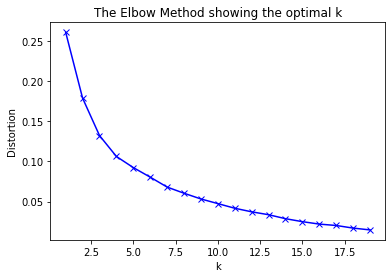

In [7]:
data = np.asarray([np.asarray(portfolio_summary['returns']),np.asarray(portfolio_summary['volatility'])]).T
X = data
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## 6.4

**Prepare a separate Data frame to show which stocks belong to the same cluster**

In [0]:
Kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0).fit(portfolio_summary)

In [0]:
portfolio_summary['Pred'] = Kmeans.predict( portfolio_summary[['returns', 'volatility']] )

In [10]:
portfolio_summary

,returns,volatility,Pred
M&M,-0.280079,0.445823,1
ITC,0.045286,0.220158,2
BAJFINANCE,0.466975,0.326457,0
GAIL,-0.054002,0.342933,2
CIPLA,0.011196,0.254396,2
INFRATEL,-0.127934,0.308959,1
DRREDDY,0.070079,0.303012,2
BPCL,-0.269219,0.441708,1
INFY,-0.024698,0.423589,2
LT,-0.088312,0.318140,2


**Visualising the clusters**

In [0]:
cmap = cm.get_cmap('Set1')
def get_color(n, max=6):
    if isinstance(n, list): 
        return [ get_color(i, max) for i in n ]
    else:
        return cmap(0. + n/max)

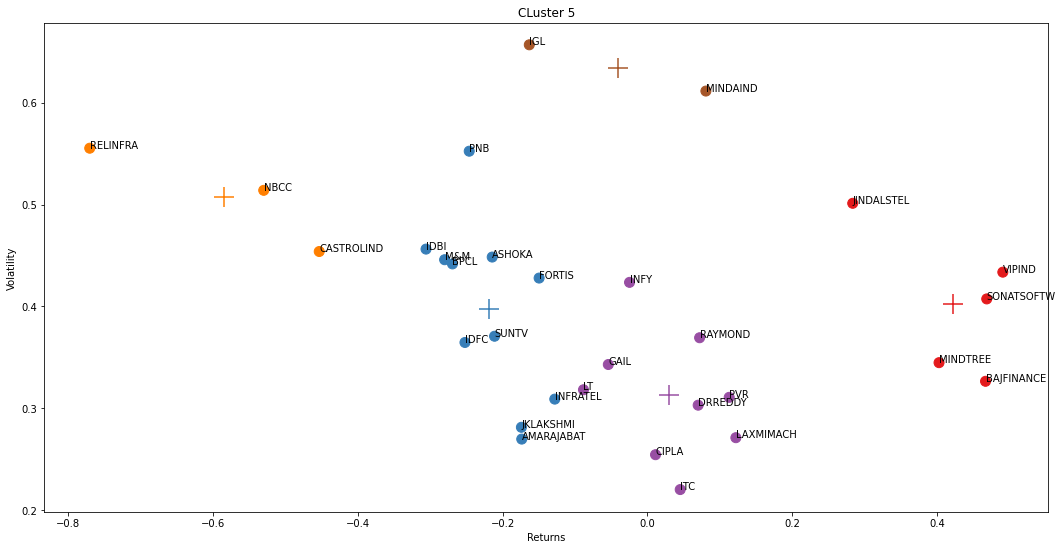

In [12]:
plt.figure(figsize = (18,9))

portfolio_kmeans_predict = portfolio_summary['Pred']

plt.scatter( portfolio_summary.returns, portfolio_summary.volatility, c=get_color(portfolio_kmeans_predict), s=100, alpha=1 )
plt.title('CLuster 5')
plt.xlabel('Returns')
plt.ylabel('Volatility')

# Mark Cluster Centers
for i, coords in enumerate( Kmeans.cluster_centers_):
    plt.scatter( coords[0], coords[1], s=400, marker='+', c=[ get_color(i) ] )
    
for i, txt in enumerate(portfolio_summary.index):
    plt.annotate(txt, (portfolio_summary.returns[i], portfolio_summary.volatility[i]))